In [4]:
# !pip install the_well[benchmark]

import matplotlib.pyplot as plt
import numpy as np
import torch
from einops import rearrange
from neuralop.models import FNO
from tqdm import tqdm

from the_well.benchmark.metrics import VRMSE
from the_well.data import WellDataset
from the_well.utils.download import well_download

# **Part 1: Define the classes for exploratory analysis of the dataset**

In [5]:
class active_matter_Dataset:

    def __init__(self, data_set_split = None, input_snapshots = None, output_snapshots = None, file_directory='./'):
        # Instance attributes
        self.data_set_split = data_set_split
        self.input_snapshots = input_snapshots
        self.output_snapshots = output_snapshots
        self.file_directory = file_directory

    # Add method to print the pre-loading stage
    def pre_loading(self):
        """
        This method prints all the parameters that will be implemented in the load_dataset method. 
        """
        print('Pre-procesing stage parameters: \n')
        if self.data_set_split == None or self.input_snapshots == None or self.output_snapshots == None:
            print('It is needed parameters to implement the data set loading.')
        else:
            print(f'input_snapshots = {self.input_snapshots}')
            print(f'output_snapshots = {self.output_snapshots}')
            print(f'Dataset split = {self.data_set_split}')

    # Add method to load the data set
    def load_dataset(self):
        dataset = WellDataset(
        well_base_path=f'{self.file_directory}/datasets',
        well_dataset_name="active_matter",
        well_split_name=self.data_set_split,
        n_steps_input = self.input_snapshots,
        n_steps_output = self.output_snapshots,
        use_normalization=False,
            )
        return dataset

In [6]:
# Exploratory analysis class 
class exploratory_analysis:
    
    # ----------------- INSTANCE ATTRIBUTES ----------------------
    def __init__(self, data_set, temporal_window_item = 0, field_type = 'input_fields'):
        # Standard dataset information
        self.data_set = data_set
        self.field_names = [name for group in self.data_set.metadata.field_names.values() for name in group]
        self.available_temporal_windows_number = len(self.data_set)

        # Lets isolate only one item (one time window)
        self.temporal_window_item = temporal_window_item
        self.field_type = field_type
        self.temporal_window = rearrange(self.data_set[self.temporal_window_item][self.field_type], "T Lx Ly F -> F T Lx Ly")
        self.fields_number = self.temporal_window.shape[0]
        self.number_time_steps = self.temporal_window.shape[1]

    #-------------------- ANALYSIS METHODS -------------------------------
    # Define a method for printing all the relevant data
    def details(self):
        """
        This method prints all the relevant details that will be implemented in the visualization methods. 
        Field type makes reference to the keyword in which the temporal window (item) is splitted. Namely, item['input_field'] or item['output_field']
        """
        print('Dataset details: \n')
        print(f'- Field type = {self.field_type} \n')
        print(f'- Number of available time-contiguous windows = {self.available_temporal_windows_number} \n')
        print(f'- Physical fields (channels) per window = \n {self.field_names} \n')
        print(f'- Time steps per window = {self.number_time_steps} \n')
        print(f'- Temporal window item = {self.temporal_window_item} \n')

    # -------------------- VISUALIZATION METHODS ------------------------------
    
    def snapshots(self):
        
        # This section is for extracting a single item from the data set
        visualizer_data = self.temporal_window

        # This section if for parameters dependent of the dataset item
        fields_number = self.fields_number # Field number
        time_lenght = self.number_time_steps

        if time_lenght<=4:
            time_lenght = time_lenght
        else:
            time_lenght = 4

        # Plot environment field_number : number of fields (rows) and time_lenght  number of time steps (columns)
        fig, axs  = plt.subplots(fields_number, time_lenght, figsize = (time_lenght * 3.4, fields_number * 2.2), dpi = 200)

        if time_lenght == 1:
            # Run over each field
            for field_index in range(fields_number):

                # Define the max. and min. for the overall time steps
                vmin = np.nanmin(visualizer_data[field_index])
                vmax = np.nanmax(visualizer_data[field_index])

                #print(self.field_names[field_index])
                axs[field_index].set_ylabel(f'{self.field_names[field_index]}', family = 'serif', size = 12)

                # It is no needed run over time domain
                axs[field_index].imshow(visualizer_data[field_index, 0], cmap = "viridis", vmin = vmin, vmax = vmax)

                # ---------- Empty the axis ticks ---------------
                axs[field_index].set_xticks([ ]) #[ ] stands for empty , [ include something if you want numbers]
                axs[field_index].set_yticks([ ])
                # ----------------------------------------------

                axs[0].set_title(f"$t_0$")

            plt.tight_layout()
        
        else:
            # Run over each field
            for field_index in range(fields_number):

                # Define the max. and min. for the overall time steps
                vmin = np.nanmin(visualizer_data[field_index])
                vmax = np.nanmax(visualizer_data[field_index])

                #print(self.field_names[field_index])
                axs[field_index, 0].set_ylabel(f'{self.field_names[field_index]}', family = 'serif', size = 12)

                # Run over each time within the given field
                for time_index in range(time_lenght):
                    #print(time_index)
                    axs[field_index, time_index].imshow(visualizer_data[field_index, time_index], cmap = "viridis", vmin = vmin, vmax = vmax)

                    # ---------- Empty the axis ticks ---------------
                    axs[field_index, time_index].set_xticks([ ]) #[ ] stands for empty , [ include something if you want numbers]
                    axs[field_index, time_index].set_yticks([ ])
                    # ----------------------------------------------

                    axs[0, time_index].set_title(f"$t_{time_index}$")

            plt.tight_layout()

        return None

# **Part 2: Class implementation**

In [14]:
# Call the first class

example_1 = active_matter_Dataset(data_set_split='train', input_snapshots = 1, output_snapshots = 1)

In [15]:
example_1.pre_loading()

Pre-procesing stage parameters: 

input_snapshots = 1
output_snapshots = 1
Dataset split = train


In [16]:
dataset = example_1.load_dataset()

In [17]:
# Call the second class

exploration1 = exploratory_analysis(dataset, temporal_window_item = 10, field_type = 'input_fields')
#exploration1 = exploratory_analysis(dataset)

In [18]:
exploration1.details()

Dataset details: 

- Field type = input_fields 

- Number of available time-contiguous windows = 14000 

- Physical fields (channels) per window = 
 ['concentration', 'velocity_x', 'velocity_y', 'D_xx', 'D_xy', 'D_yx', 'D_yy', 'E_xx', 'E_xy', 'E_yx', 'E_yy'] 

- Time steps per window = 1 

- Temporal window item = 10 



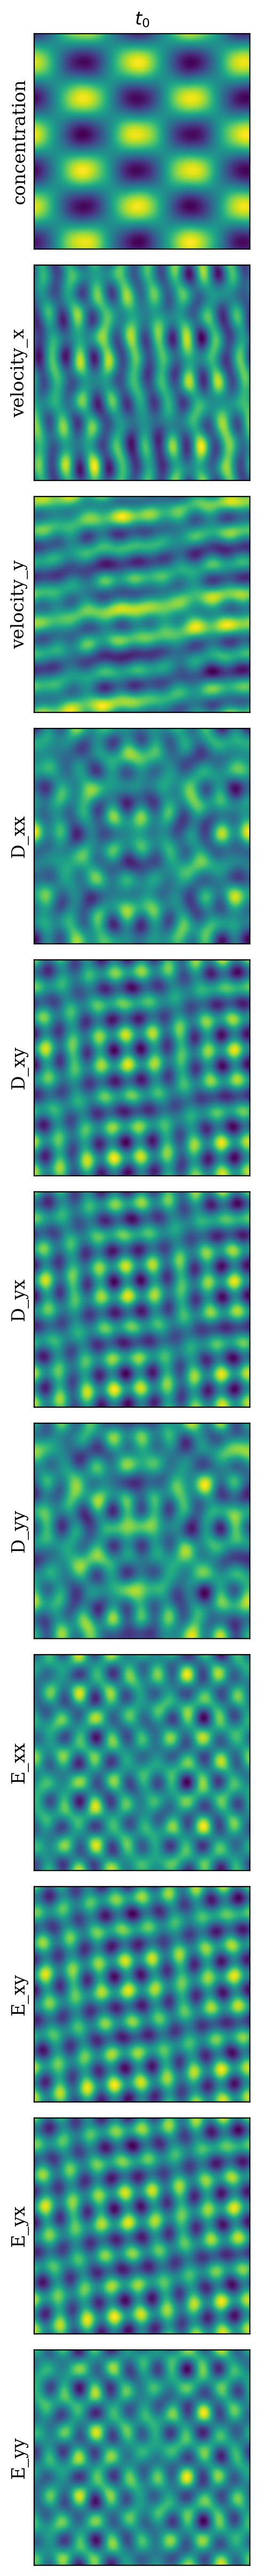

In [9]:
exploration1.snapshots()

**How to improve this class?**

- Implement a method for drawing a unique field when its name is given.